In [26]:
import csv
import cv2
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.decomposition import PCA
from mat4py import loadmat
import sklearn
import scipy
import networkx as nx
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("fashion-mnist_train.csv")

In [4]:
#df.head()

In [5]:
M = df.to_numpy() #M is 5x785 !!!where first column is labels!!!  28x28 pixel images

In [7]:
M.shape

(60000, 785)

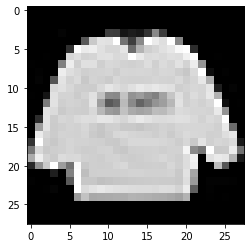

In [9]:
x0 = np.reshape(M[0,1:], (28, 28))
plt.imshow(x0, cmap ='gray')
plt.show()

In [20]:
train_matrix = M[:,1:] # matrix where each column is an image First column is label so exclude that

In [21]:
train_matrix.shape

(60000, 784)

In [22]:
y = M[:,0] # labels for images

In [60]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [24]:
# test data
df = pd.read_csv("fashion-mnist_test.csv")
Mtest = df.to_numpy()
test_matrix = Mtest[:,1:]
y_true = Mtest[:,0]

In [ ]:
### Models

In [85]:
clf = MLPClassifier(solver='adam', alpha=1e-5,
                     hidden_layer_sizes=(20,10), random_state=1,max_iter=1000)
clf.fit(train_matrix, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(20, 10), max_iter=1000,
              random_state=1)

In [86]:
y_pred = clf.predict(test_matrix)

In [87]:
score = accuracy_score(y_true,y_pred)

In [88]:
score

0.8378

#### Results

lbfsd:  
(40,30): gives 53% accuracy  
adam:  
(40,30) gives 80%  
(20,10) gives 84%  
(80,10) gives 87% note there are 10 labels and I used 10 nodes in last layer
(100, 10) gives 10%  !!!!!????
(60,10) gives 86%
(50,10) gives 87%  
(40,10) gives 86.1%  
(30,10) gives 85.8%
sgd:  
(20,10) gives 10% was very fast
(40,30) gives 10% was very fast
  
    
**analysis of solver, alpha and hidden_layer_sized**  
hidden_layer_size is a tuple, length of tuple is the number of layers and ith entry gives nodes in ith layer (150,200,100) means 3 layers with 150 nodes in first layer, 200 insecond and 100 in third layer.

## Notes:  
One way is to stick to Multi-layer Perceptron classifier and keep experinemting with layer sizes and solver  
The other option should be to use different neural networks like CNNs and ResNets ets